In [130]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import cmcrameri

# Load experiment results

In [79]:
# Definitions
path = "../results/influence_of_fourier_dropout/"
metrics = ['MSETest','EnergyScoreTest', 'CRPSTest', 'Gaussian NLLTest', 'CoverageTest',
    'IntervalWidthTest']
agg_groups = ["dropout", "fourier_dropout"]
methods = ["scoring-rule-dropout"]


# Load experiment results
results = pd.DataFrame()
# Loop over subfolders
folders = os.listdir(path)
for sf in folders:
    if os.path.isdir(path + sf):
        file = os.path.join(path+sf, "test.csv")
        # Read file if exits
        if os.path.exists(file):
            results_df = pd.read_csv(file, index_col=0)
            results = pd.concat([results, results_df], axis = 1)
rows = metrics.copy()
for g in agg_groups:
    rows.append(g)

results = results.loc[rows]
results.loc[metrics] = results.loc[metrics].astype("float32")

results = results.transpose()
# Group by uncertainty quantification method
results_df = results.groupby(agg_groups).mean().astype("float32")
results_df.to_csv(f"{path}aggregated_results.csv")

# Create latex table

In [80]:
results_df

MSETest  EnergyScoreTest  CRPSTest  Gaussian NLLTest  \
dropout fourier_dropout                                                         
0.01    0.01             0.89982          0.63368   0.56658           1.48656   
        0.02             0.89417          0.62963   0.54686           1.42809   
        0.05             0.90322          0.63612   0.53148           1.57136   
        0.1              0.88992          0.62662   0.52363           1.58348   
        0.2              0.88582          0.62371   0.52634           1.61291   
0.02    0.01             0.90417          0.63668   0.54623           1.45766   
        0.02             0.90535          0.63763   0.54101           1.42991   
        0.05             0.88869          0.62593   0.52231           1.50184   
        0.1              0.89419          0.62976   0.52960           1.61320   
        0.2              0.88477          0.62307   0.52761           1.61909   
0.05    0.01             0.89072          0.62745   0.51807           1.47980   
        0.02             0.89218          0.62836   0.52210           1.49681   
        0.05             0.89078          0.62733   0.53421           1.67762   
        0.1              0.89001          0.62682   0.54665           1.97420   
        0.2              0.88058          0.62009   0.53272           1.79492   
0.1     0.01             0.90719          0.63899   0.53568           1.57335   
        0.02             0.89144          0.62796   0.53438           1.67080   
        0.05             0.89097          0.62763   0.54253           1.81262   
        0.1              0.88769          0.62551   0.56432           3.17703   
        0.2              0.88522          0.62344   0.55367           2.72494   
0.2     0.01             0.88914          0.62642   0.55205           2.20828   
        0.02             0.88702          0.62495   0.55632           2.55599   
        0.05             0.88950          0.62663   0.55607           2.42866   
        0.1              0.88690          0.62466   0.56395           3.42211   
        0.2              0.88278          0.62169   0.56747           6.73509   

                         CoverageTest  IntervalWidthTest  
dropout fourier_dropout                                   
0.01    0.01                  0.85055            3.46486  
        0.02                  0.87458            3.48246  
        0.05                  0.83660            3.26295  
        0.1                   0.83365            3.21513  
        0.2                   0.82943            3.24273  
0.02    0.01                  0.89827            3.68152  
        0.02                  0.90513            3.64253  
        0.05                  0.86671            3.35187  
        0.1                   0.82939            3.23633  
        0.2                   0.82786            3.25778  
0.05    0.01                  0.87124            3.28651  
        0.02                  0.86601            3.31901  
        0.05                  0.81975            3.23600  
        0.1                   0.77657            3.13698  
        0.2                   0.80783            3.21223  
0.1     0.01                  0.84185            3.22857  
        0.02                  0.81513            3.16684  
        0.05                  0.79292            3.13369  
        0.1                   0.73915            3.08736  
        0.2                   0.76378            3.08210  
0.2     0.01                  0.75982            2.97286  
        0.02                  0.74309            2.95572  
        0.05                  0.75275            3.01108  
        0.1                   0.73523            2.99044  
        0.2                   0.73194            3.04693

In [81]:
# Initialize an empty DataFrame to store the formatted values
formatted_df = pd.DataFrame()
metrics = results_df.transpose().index[-6:] # Extract only test metrics
methods = list(results_df.transpose().columns.unique())  # Methods are the top level of the columns MultiIndex

# Create a new DataFrame with the method as the index and metrics as columns
for metric in metrics:
    formatted_df[metric] = [
        f"{results_df.transpose().loc[metric, method]:.4f}"
        for method in methods
    ]
formatted_df.index = methods
latex_table = formatted_df.to_latex(escape=False)
#  save to a file
with open(f"{path}aggregated_results.tex", "w") as f:
        f.write(latex_table)

# Plot Heatmap

In [151]:
dropout = np.array([0.01,0.02,0.05,0.1,0.2])
dropout_grid, dropout_grid_f = np.meshgrid(dropout, dropout)
metrics = ['MSETest','EnergyScoreTest', 'CRPSTest', 'Gaussian NLLTest']
metric_names = [r'$\mathcal{L}_{L^2}$', 'ES', 'CRPS', 'NLL']

tick_size = 16
label_size = 18
title_size = 22

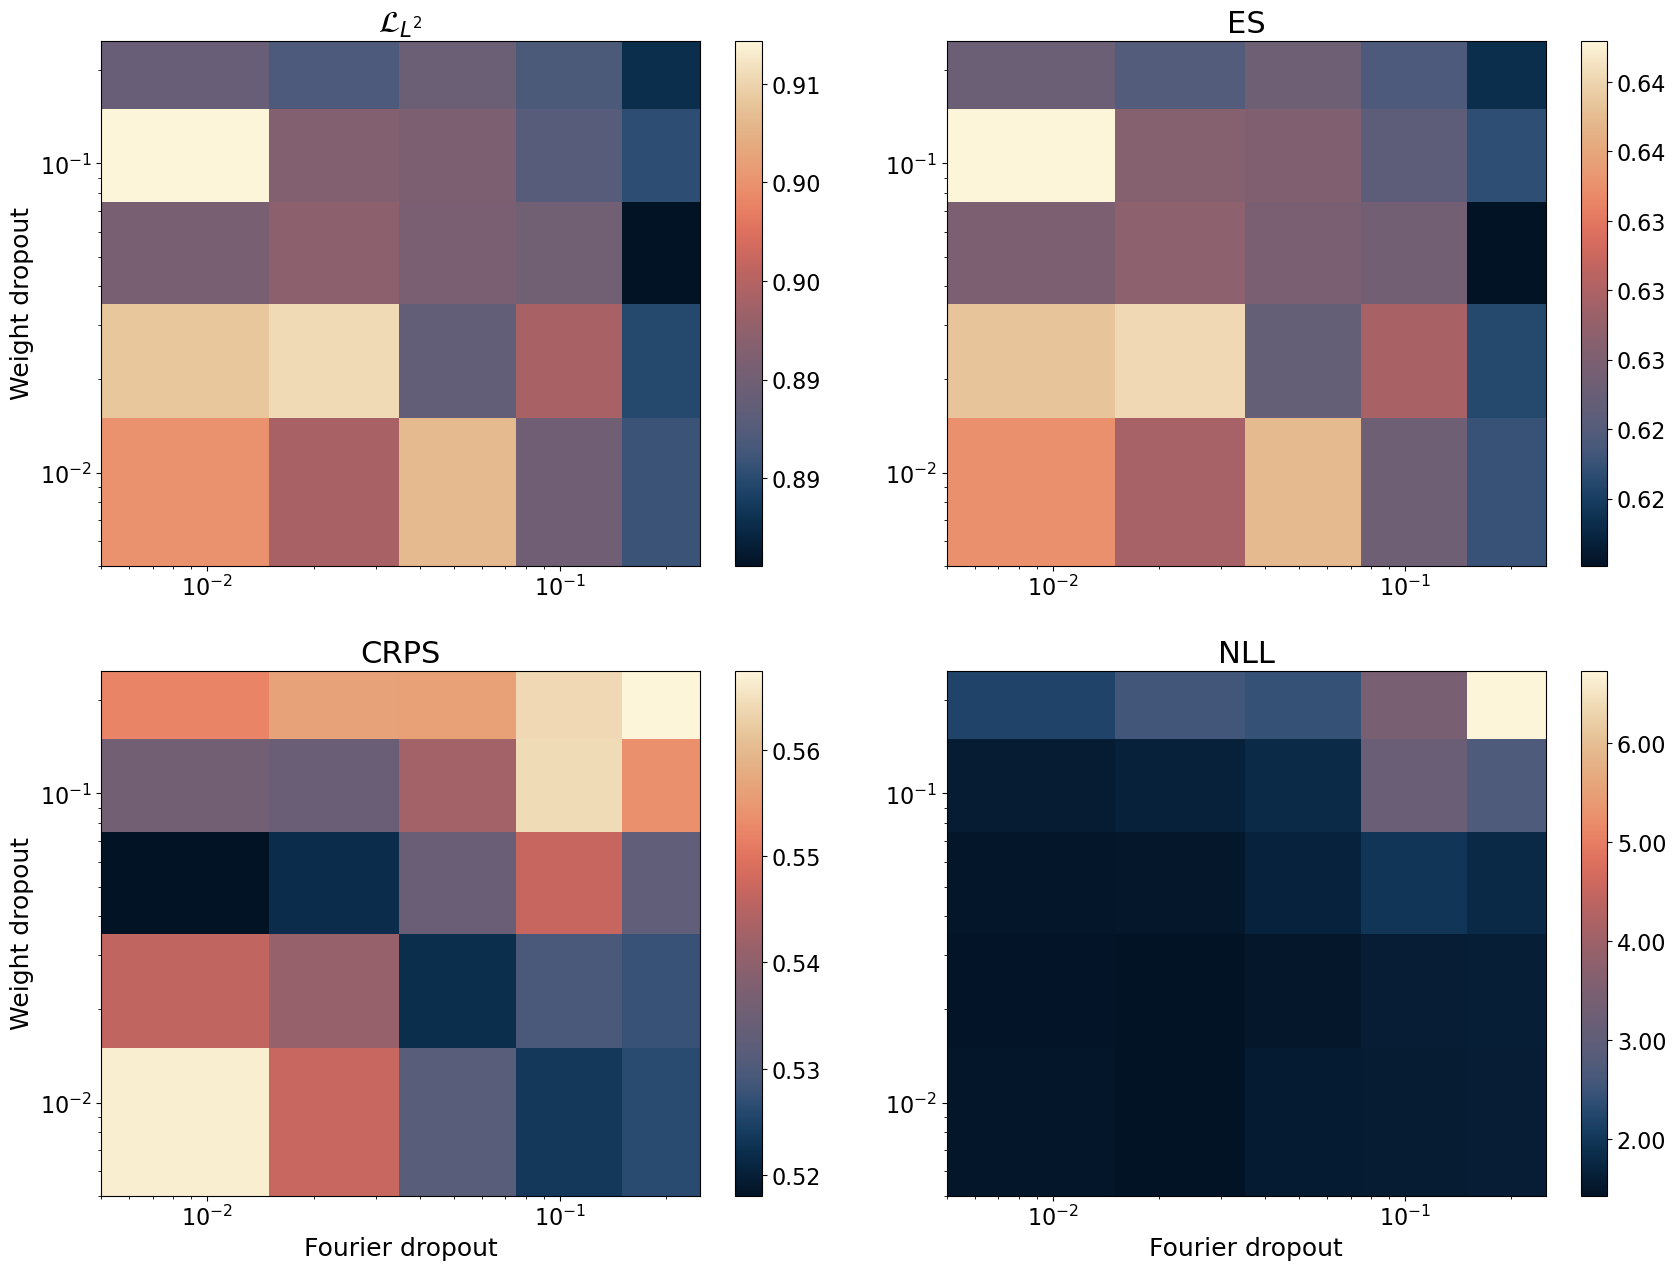

In [162]:
fig, axs = plt.subplots(2,2, figsize = (20,15))
axs = axs.ravel()
fmt = lambda x, pos: '{:.2f}'.format(x)

for i, metric in enumerate(metrics):
    res = results_df[metric].values
    im = axs[i].pcolormesh(dropout_grid, dropout_grid_f, res.reshape(5,5), shading = "nearest", cmap = "cmc.lipari", rasterized = True)
    cb1 = fig.colorbar(im, ax = axs[i], fraction = 0.10, format = FuncFormatter(fmt))
    cb1.ax.tick_params(labelsize=tick_size) 
    axs[2].set_xlabel(r"Fourier dropout", fontsize = label_size)
    axs[3].set_xlabel(r"Fourier dropout", fontsize = label_size)
    axs[0].set_ylabel(r"Weight dropout", fontsize = label_size)
    axs[2].set_ylabel(r"Weight dropout", fontsize = label_size)
    axs[i].set_title(metric_names[i], fontsize = title_size)
    # Set tick size
    axs[i].xaxis.set_tick_params(labelsize=tick_size)
    axs[i].yaxis.set_tick_params(labelsize=tick_size)
    axs[i].set_yscale('log')
    axs[i].set_xscale('log')

plt.savefig("plots/plots/fourier_dropout.pdf", dpi = 300, bbox_inches = "tight")